In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import stats
from scipy.signal import get_window
import glob
import time

def filtering_func(freqs, fft, phases, f1, f2):  #passing complex numbers
    noise_fft = fft.copy()

    abs_fft = np.abs(fft)
    valid_indices = np.where((freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1))[0]

    fft_in_range = abs_fft[valid_indices]
    print(f'fft_in_range: {fft_in_range} ')

    peak = np.max(fft_in_range)

    local_peak_indices = np.where(abs_fft[valid_indices] == peak)[0]
    general_peak_indices = valid_indices[local_peak_indices]
    print(f"general_peak_indices: {general_peak_indices}")
    print(f"abs_fft[general_peak_indices]: {abs_fft[general_peak_indices]}")

    peak_f = freqs[general_peak_indices]
    print(f"peak_f: {peak_f}")

    peak_phase = phases[general_peak_indices]
    print(f"peak_phase: {peak_phase}")

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}')
    mask = np.ones(len(noise_fft), dtype=bool)
    mask[general_peak_indices] = False
    noise_fft[mask] = complex(0, 0)
    return noise_fft, peak_f, peak_phase

In [84]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

#amplitudes1 = np.sin(5 * 2*np.pi * times + np.pi/2) 
#np.pi/2 is necessary for the fft bc it uses cos
amplitudes1 = 10*np.sin(5 * 2*np.pi * times + np.pi/4 )
amplitudes2 = 4*np.sin(3 * 2*np.pi * times + np.pi/7 ) 
amplitudes = amplitudes2 + amplitudes1

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


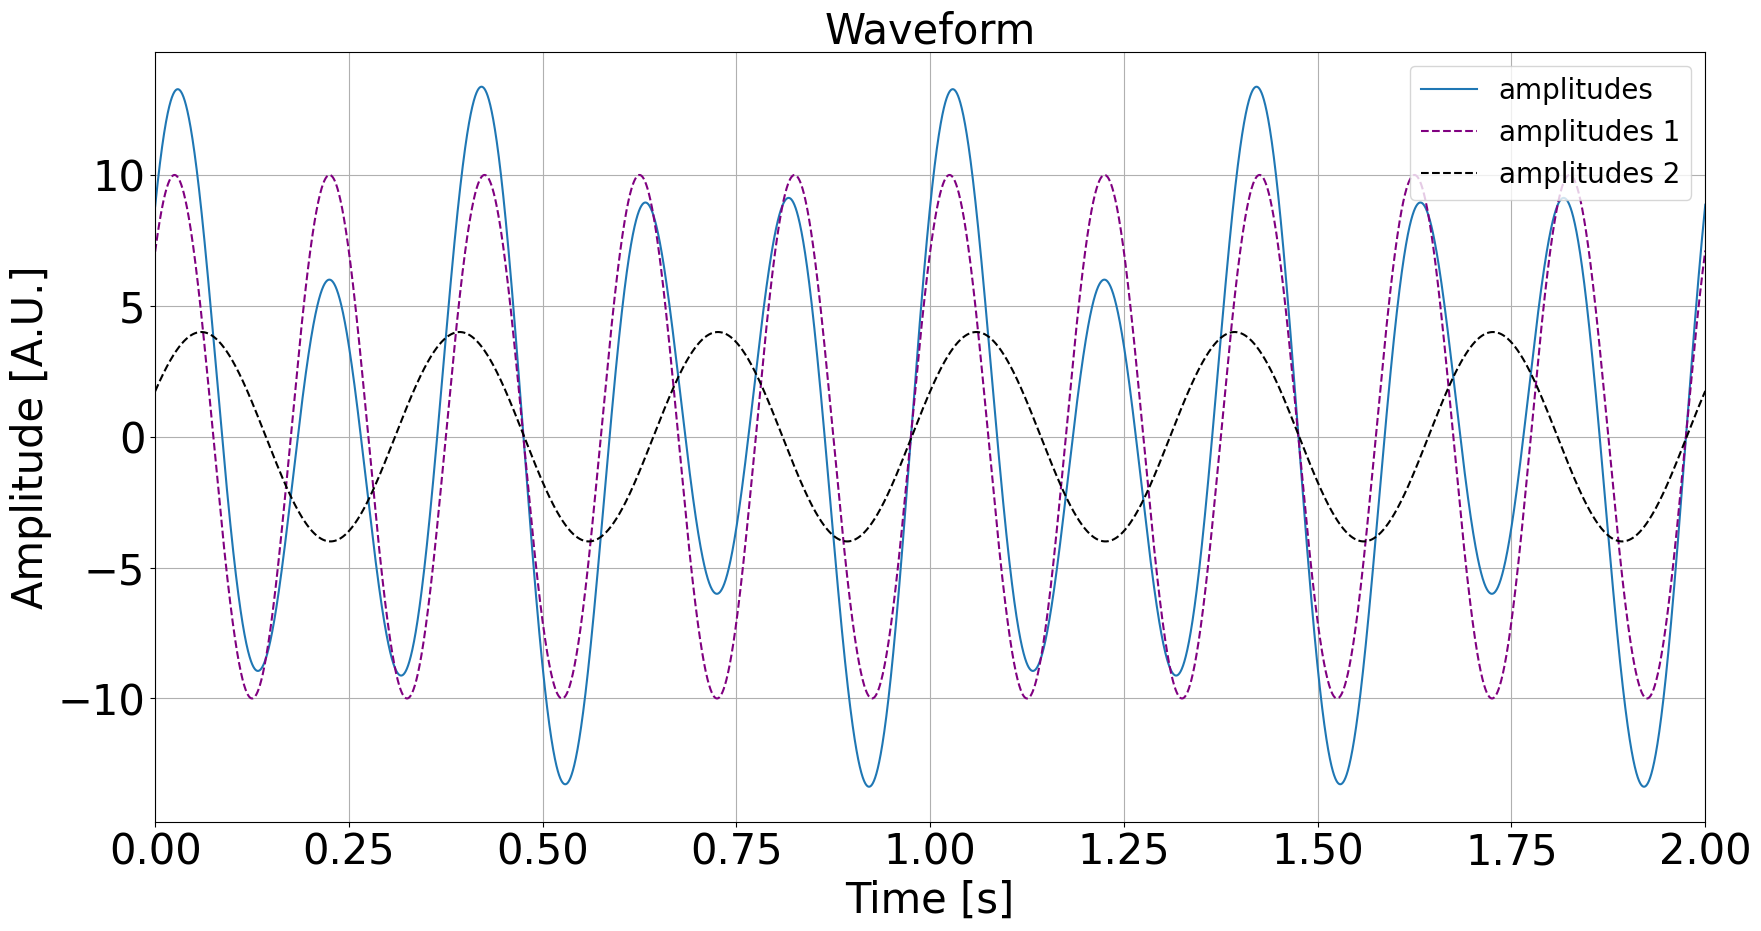

In [85]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'amplitudes')
plt.plot(times, amplitudes1, label = 'amplitudes 1', color = 'purple', linestyle = '--')
plt.plot(times, amplitudes2, label = 'amplitudes 2', color = 'black', linestyle = '--')
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [86]:
freqs = fft.fftfreq(len(times), 1/f_s)
print(f"last freq: {freqs[-1]}") ##this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)

last freq: -0.1
len(freqs): 50000
[ 0.   0.1  0.2 ... -0.3 -0.2 -0.1]


In [87]:
magnitudes = fft.fft(amplitudes) #when i'm filtering, i'm filtering something complex
n = np.max(np.abs(magnitudes))

phases = np.angle(magnitudes)

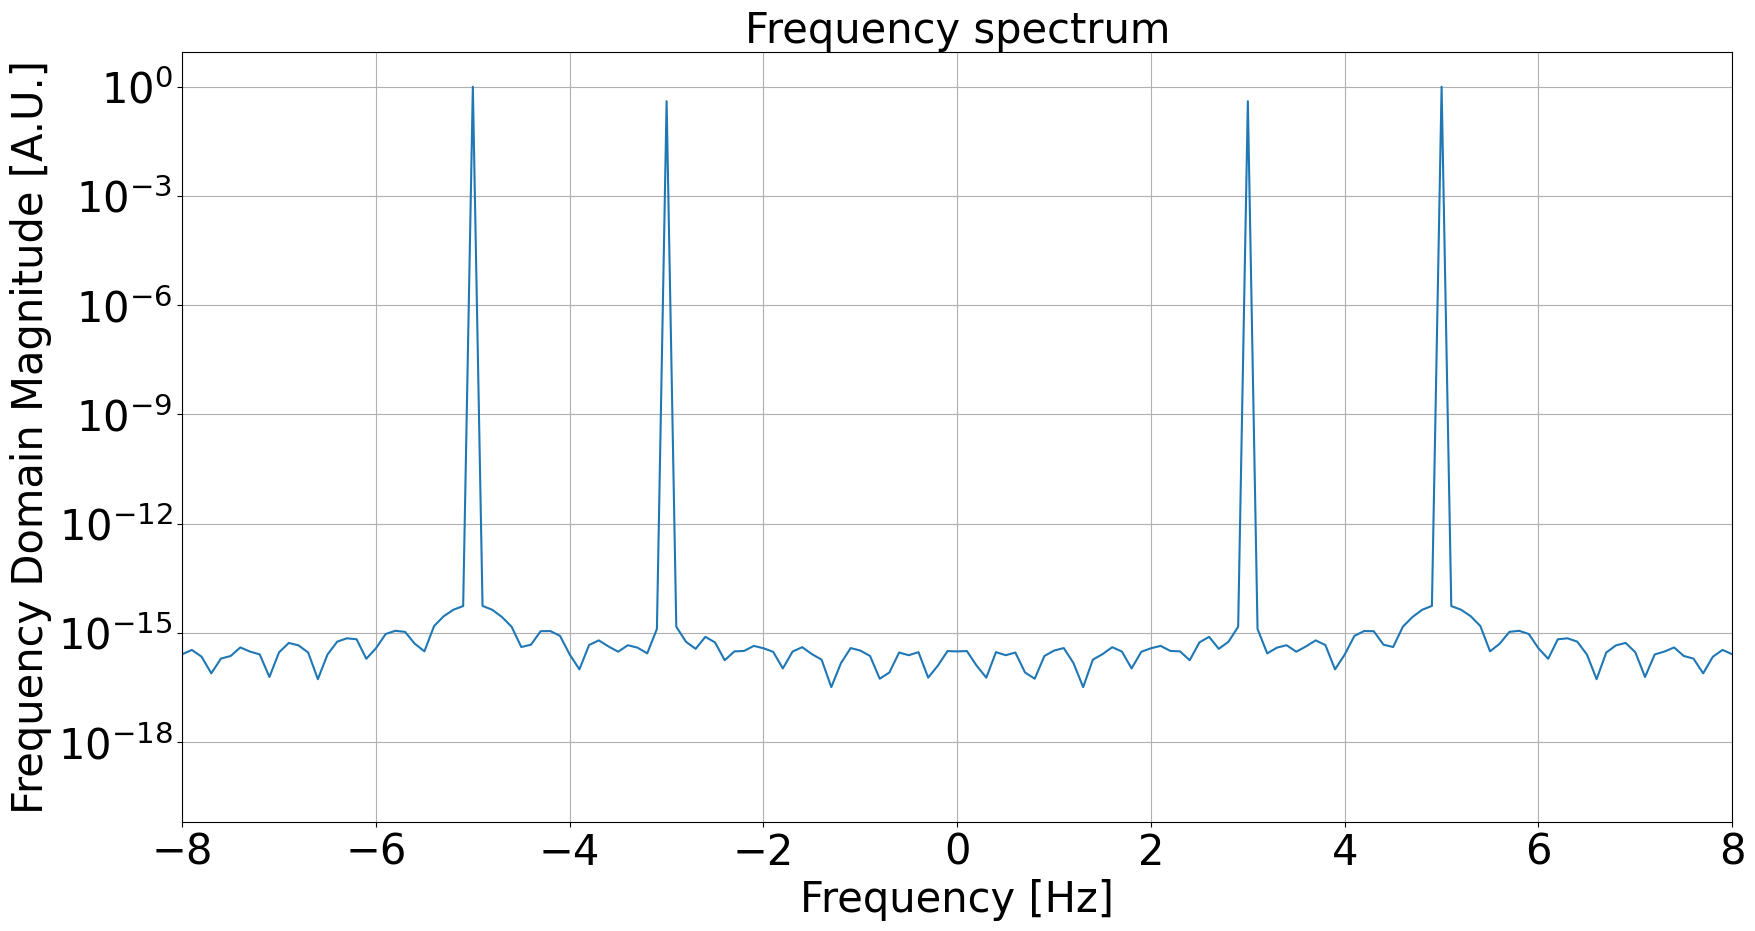

In [88]:
freqs_shifted = fft.fftshift(freqs)
magnitudes_shifted = fft.fftshift(magnitudes)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(- f_s / 2, f_s / 2) #freq of time sampling
plt.semilogy()
plt.xlim(- 8, 8)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [89]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_phases = phases[:round((N/2))]
    pos_amplitudes = amplitudes[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_phases = phases[:round((N-1)/2 + 1)]
    pos_amplitudes = amplitudes[:round((N-1)/2 + 1)]

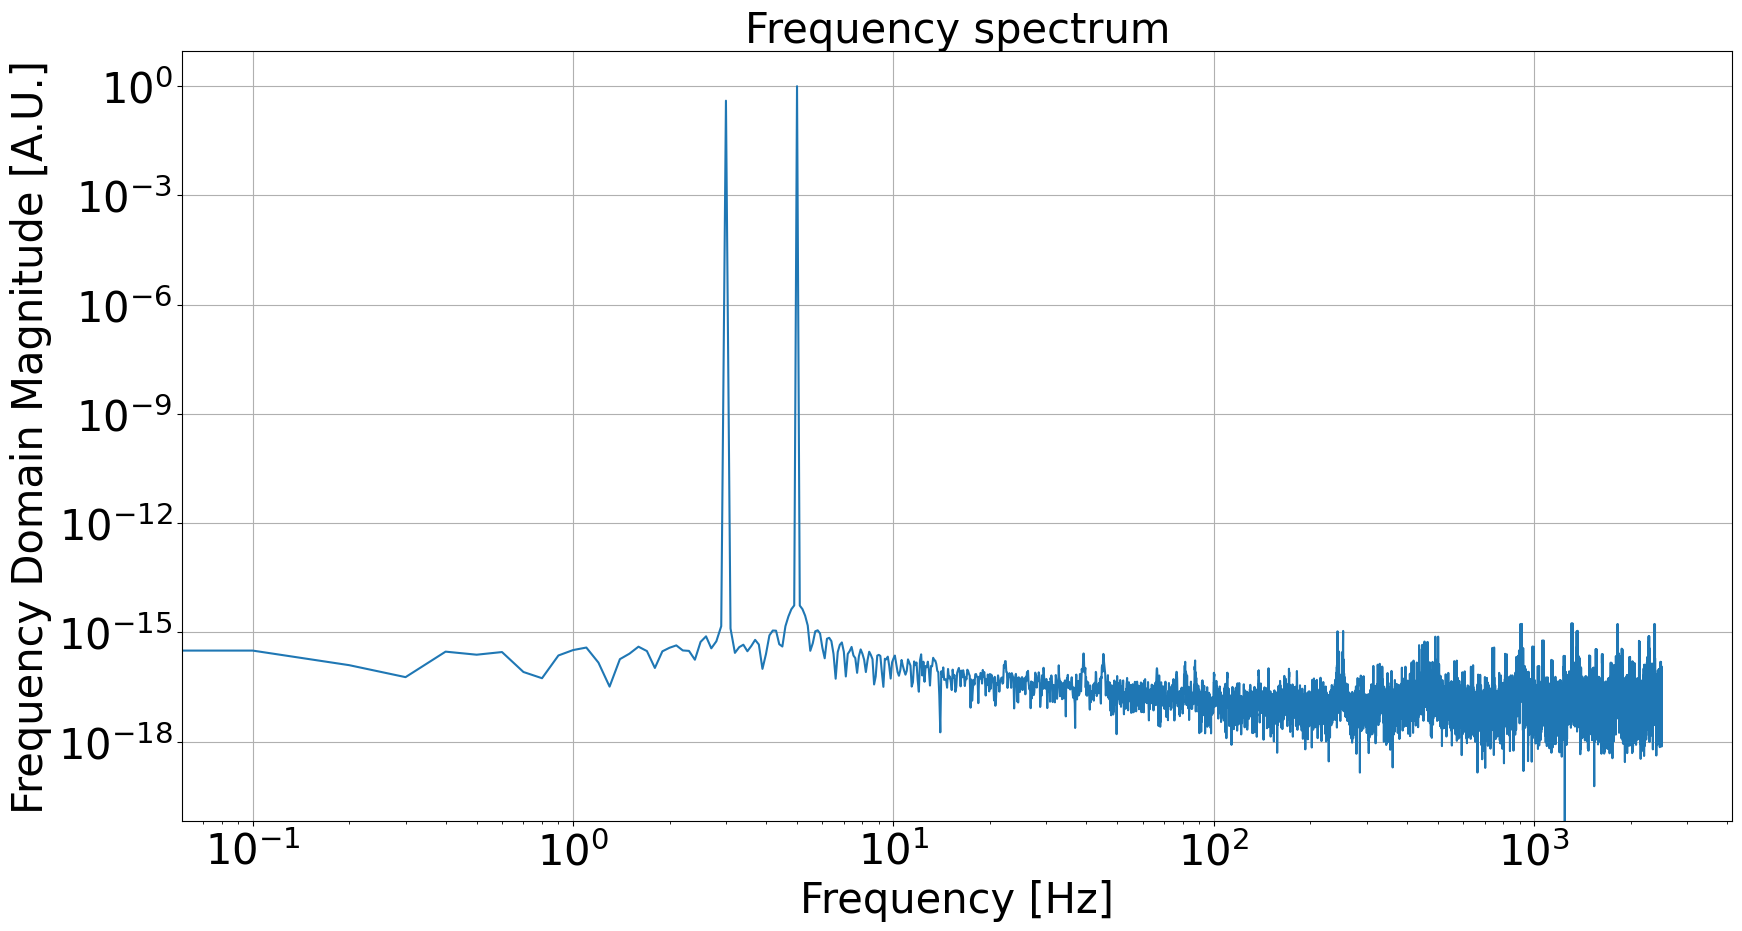

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n)

plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(0, f_s / 2) #f_s = freq of time sampling
plt.loglog()
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

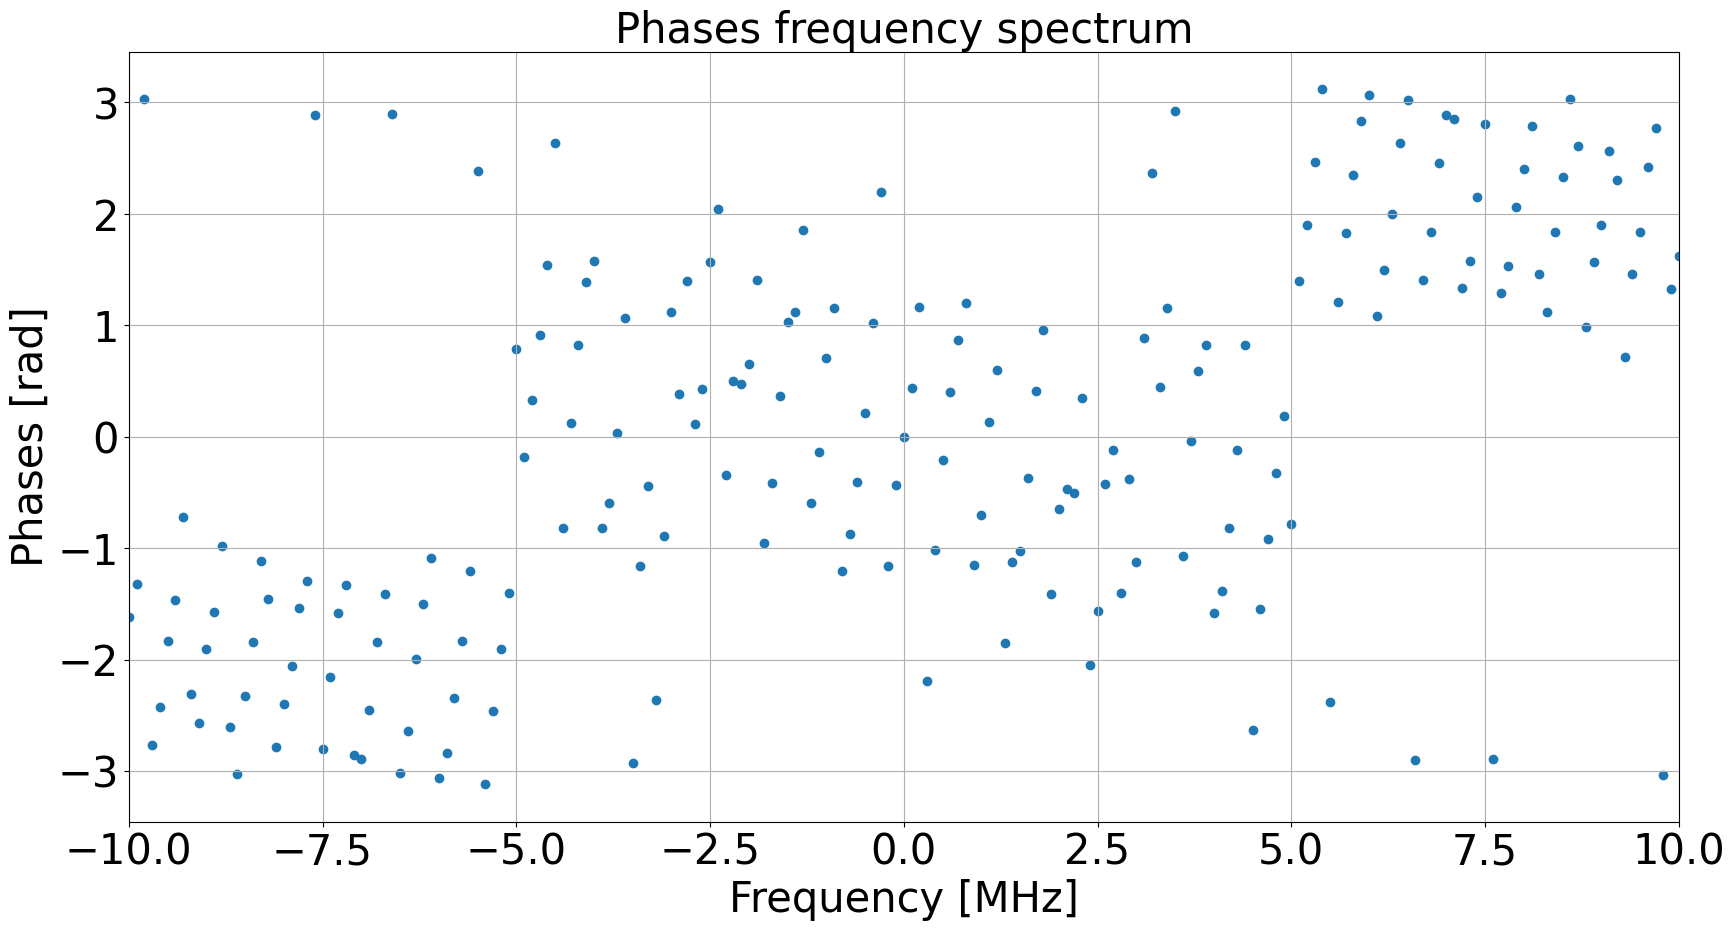

In [91]:
plt.figure(figsize=(20, 10))
plt.scatter(freqs, phases)

plt.title('Phases frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Phases [rad]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(-10, 10)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

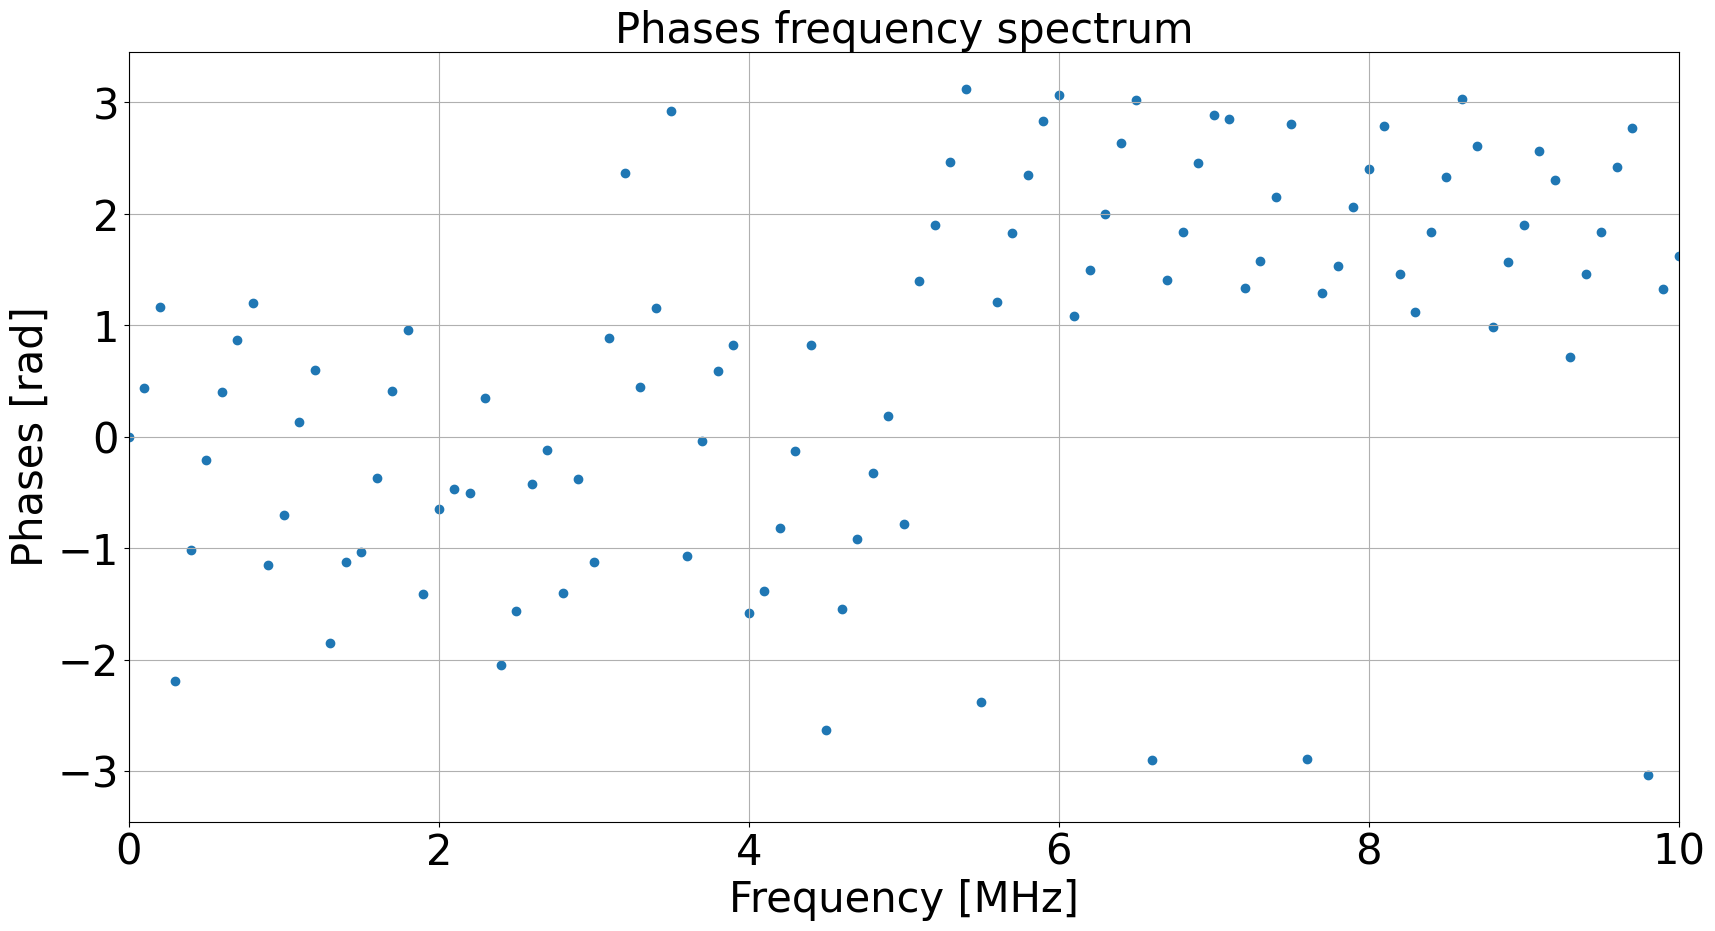

[-1.12199738]


In [108]:
plt.figure(figsize=(20, 10))
plt.scatter(pos_freqs, pos_phases)

plt.title('Phases frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Phases [rad]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 10)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()
print(pos_phases[pos_freqs == 3])

In [128]:
f1 = 2
f2 = 4

## Filtering

In [94]:
noise_fft, peak_f, peak_phases = filtering_func(freqs, magnitudes, phases, f1, f2)

fft_in_range: [9.43981915e-11 1.09598402e-10 7.97119036e-11 7.74450671e-11
 4.42958232e-11 1.36661310e-10 1.94221760e-10 9.10226719e-11
 1.42100427e-10 3.68997391e-10 1.00000000e+05 3.19837381e-10
 6.83096228e-11 9.79676813e-11 1.14415641e-10 7.57753917e-11
 1.05952457e-10 1.55356728e-10 1.15837754e-10 2.48215293e-11
 6.35158812e-11 6.35158812e-11 2.48215293e-11 1.15837754e-10
 1.55356728e-10 1.05952457e-10 7.57753917e-11 1.14415641e-10
 9.79676813e-11 6.83096228e-11 3.19837381e-10 1.00000000e+05
 3.68997391e-10 1.42100427e-10 9.10226719e-11 1.94221760e-10
 1.36661310e-10 4.42958232e-11 7.74450671e-11 7.97119036e-11
 1.09598402e-10 9.43981915e-11] 
general_peak_indices: [   30 49970]
abs_fft[general_peak_indices]: [100000. 100000.]
peak_f: [ 3. -3.]
peak_phase: [-1.12199738  1.12199738]
sum: 2


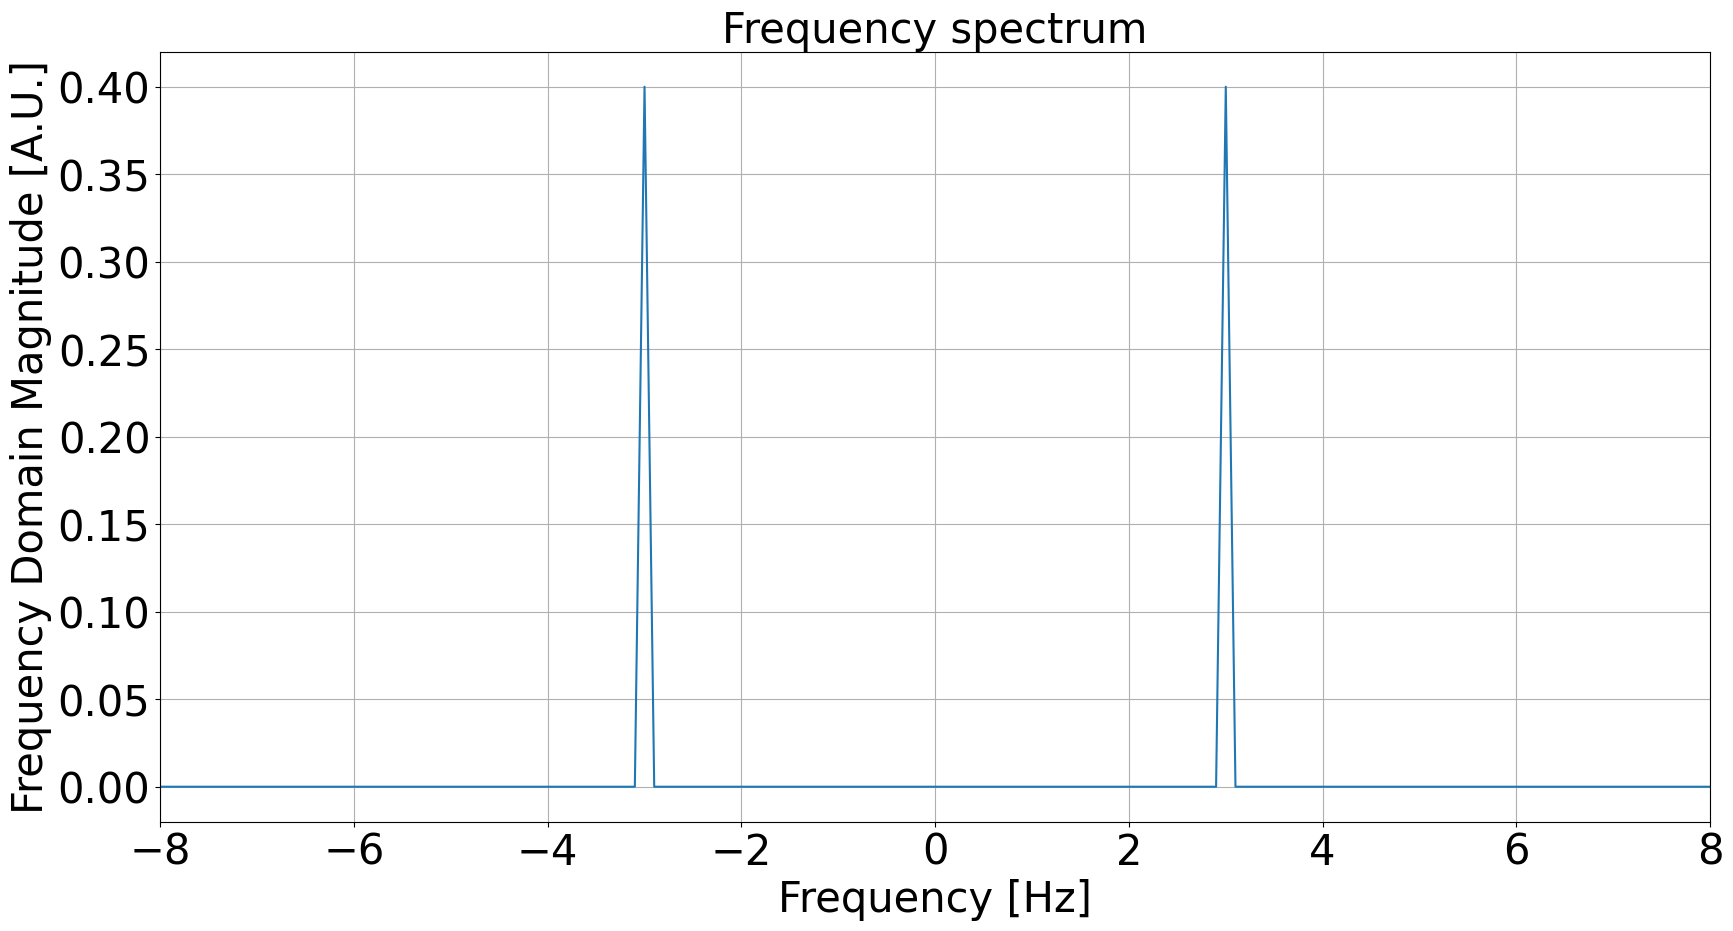

In [126]:
noise_fft_shifted = fft.fftshift(noise_fft)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(noise_fft_shifted)/n)

plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(- f_s / 2, f_s / 2) #freq of time sampling
plt.xlim(-8, 8)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()


In [96]:
# times_new_2 = np.arange(N) / f_s_new

#noise_wf = np.cos(peak_f[0]* 2*np.pi * times + peak_phases[0])

noise_wf = fft.ifft(noise_fft)

In [97]:
A = max(noise_wf.real)
f = peak_f[0]
phi = peak_phases[0]
coswave = A*np.cos(f*np.pi*2*times + phi)
sinwave = A*np.sin(f*np.pi*2*times + phi)

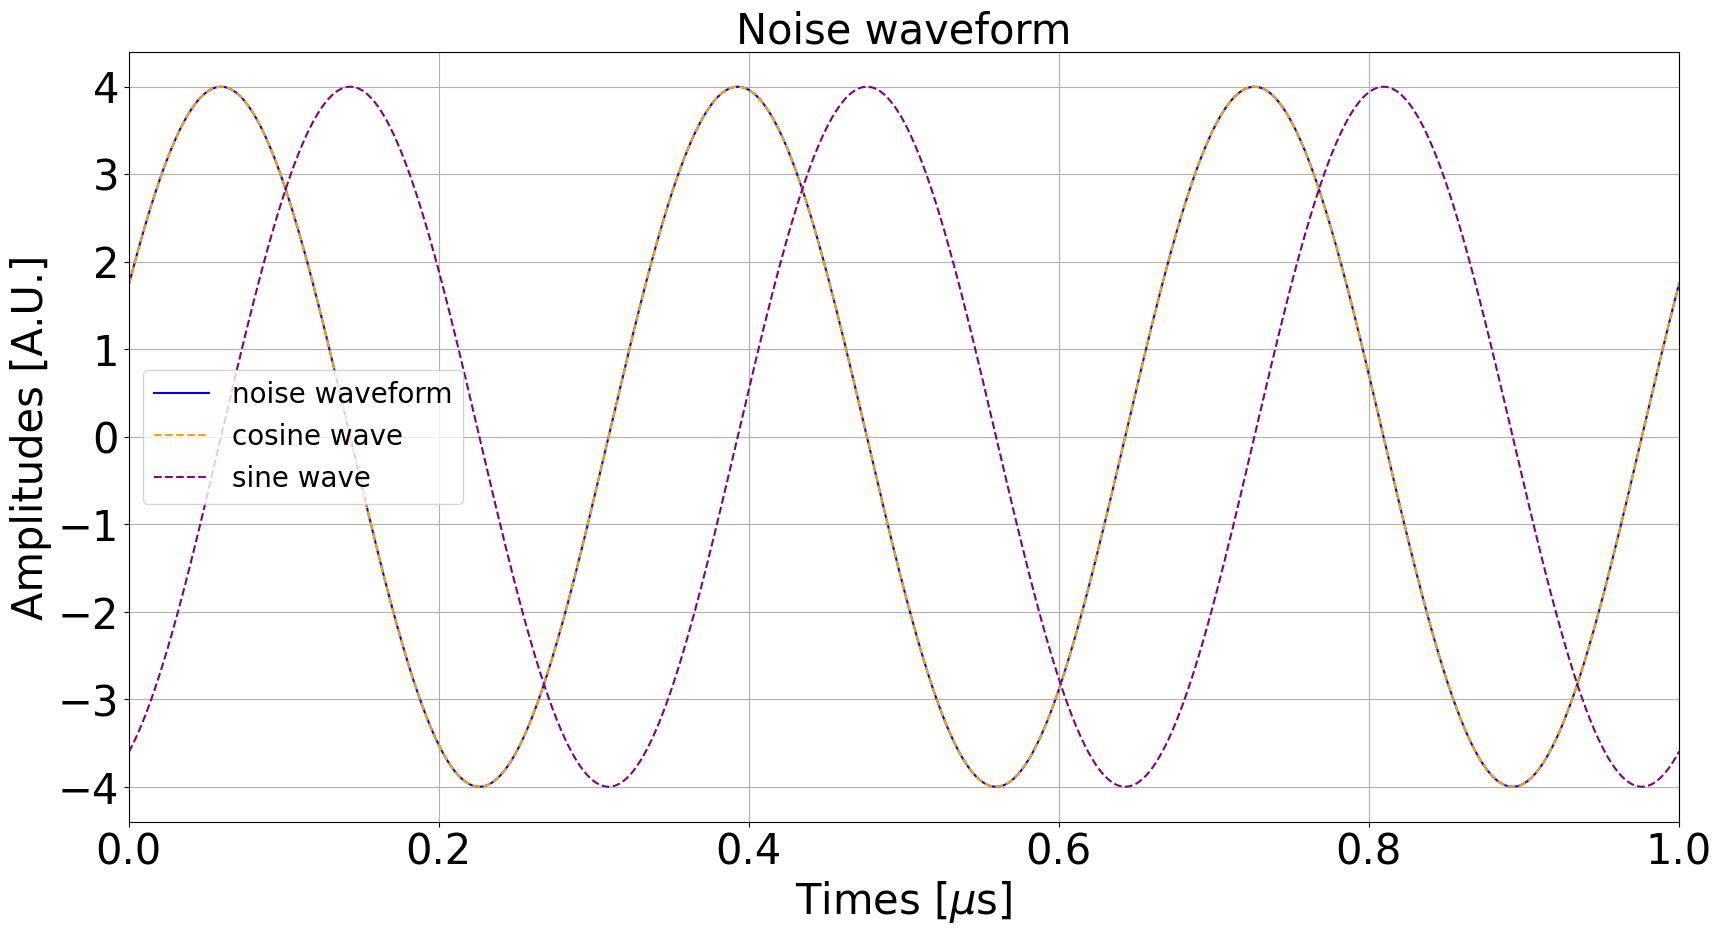

In [109]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(times, noise_wf.real, color = 'blue', label = 'noise waveform') #you can see that it remembers the phase only if you pass the complex numbers as fft to fft.ifft
plt.plot(times, coswave, linestyle = '--', color = 'orange', label = 'cosine wave')
plt.plot(times, sinwave, linestyle = '--', color = 'purple', label = 'sine wave')

plt.title('Noise waveform', fontsize = 30)
plt.xlabel(r'Times [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitudes [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [110]:
declareted_phase = pos_phases[pos_freqs == 3]
print(f"declareted phase: {declareted_phase*180/np.pi}")
real_phase = np.arcsin(noise_wf.real[0]/A)
print(f"real phase: {real_phase*180/np.pi}")
print(f"difference: {(real_phase - declareted_phase)*180/np.pi}")

declareted phase: [-64.28571429]
real phase: 25.71428615889656
difference: [90.00000044]


## Compare to original waveform

In [111]:
reconstructed_wf = fft.ifft(magnitudes)

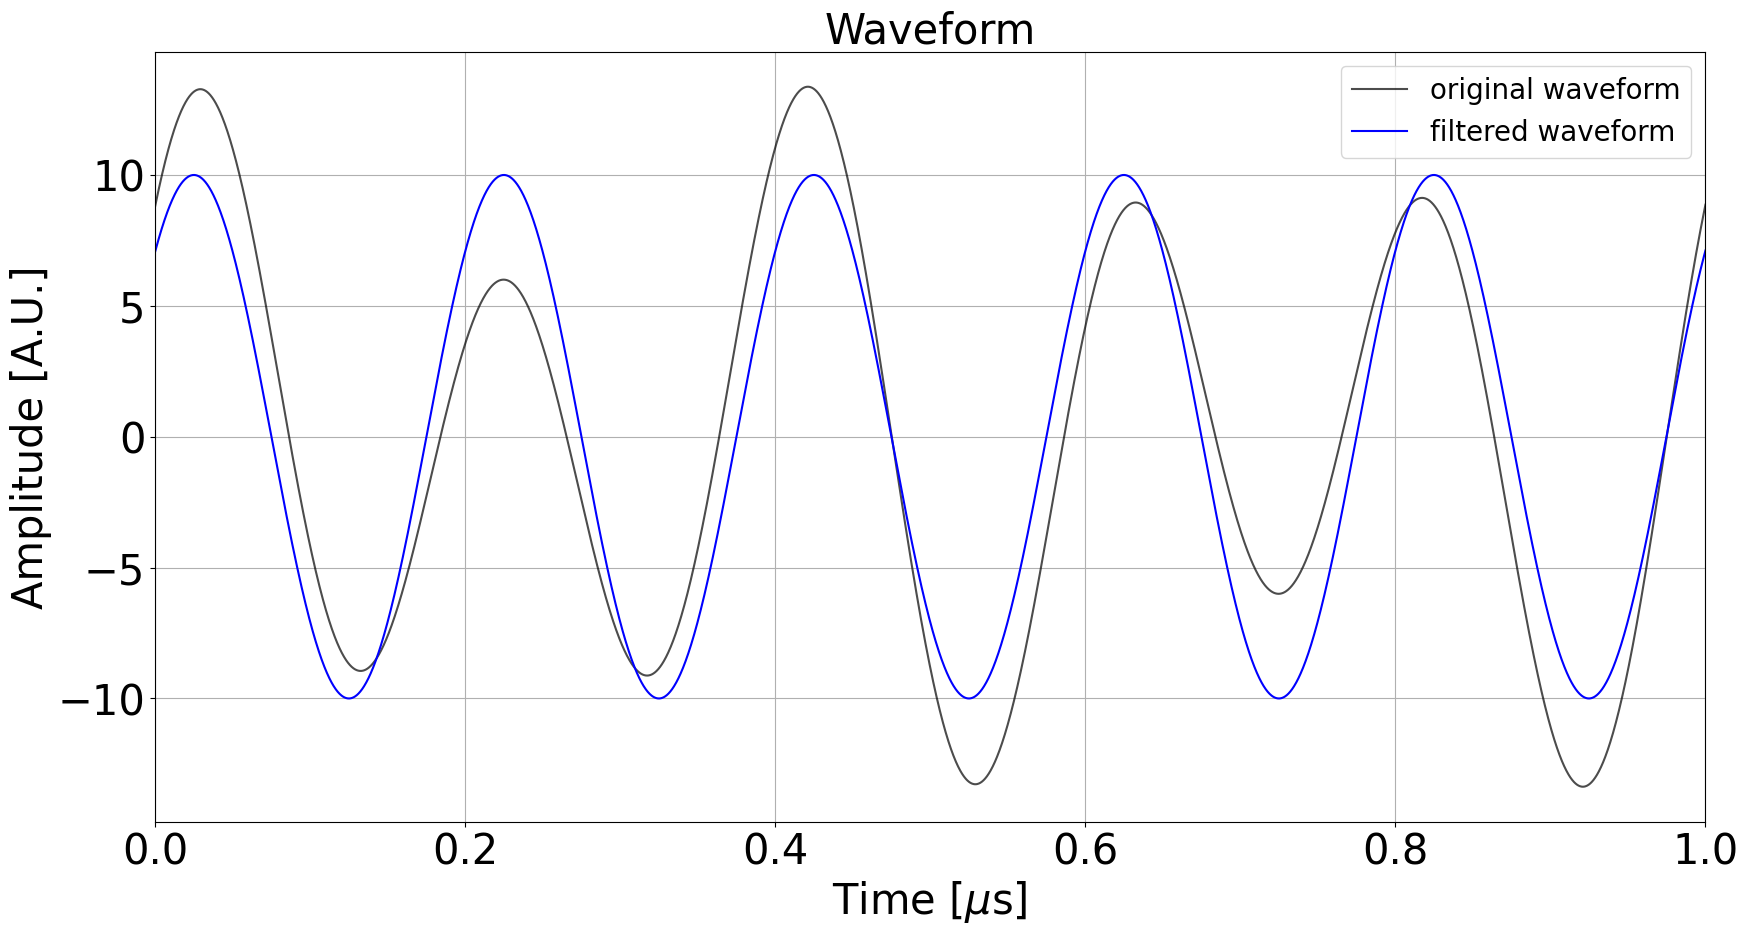

In [112]:
plt.figure(figsize = (20, 10))
plt.plot(times, reconstructed_wf.real, label = 'original waveform', color = 'black', alpha = 0.7)
plt.plot(times, reconstructed_wf.real - noise_wf.real, label = 'filtered waveform', color = 'blue')
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Make sure reconstructed waveforma and original waveform are the same

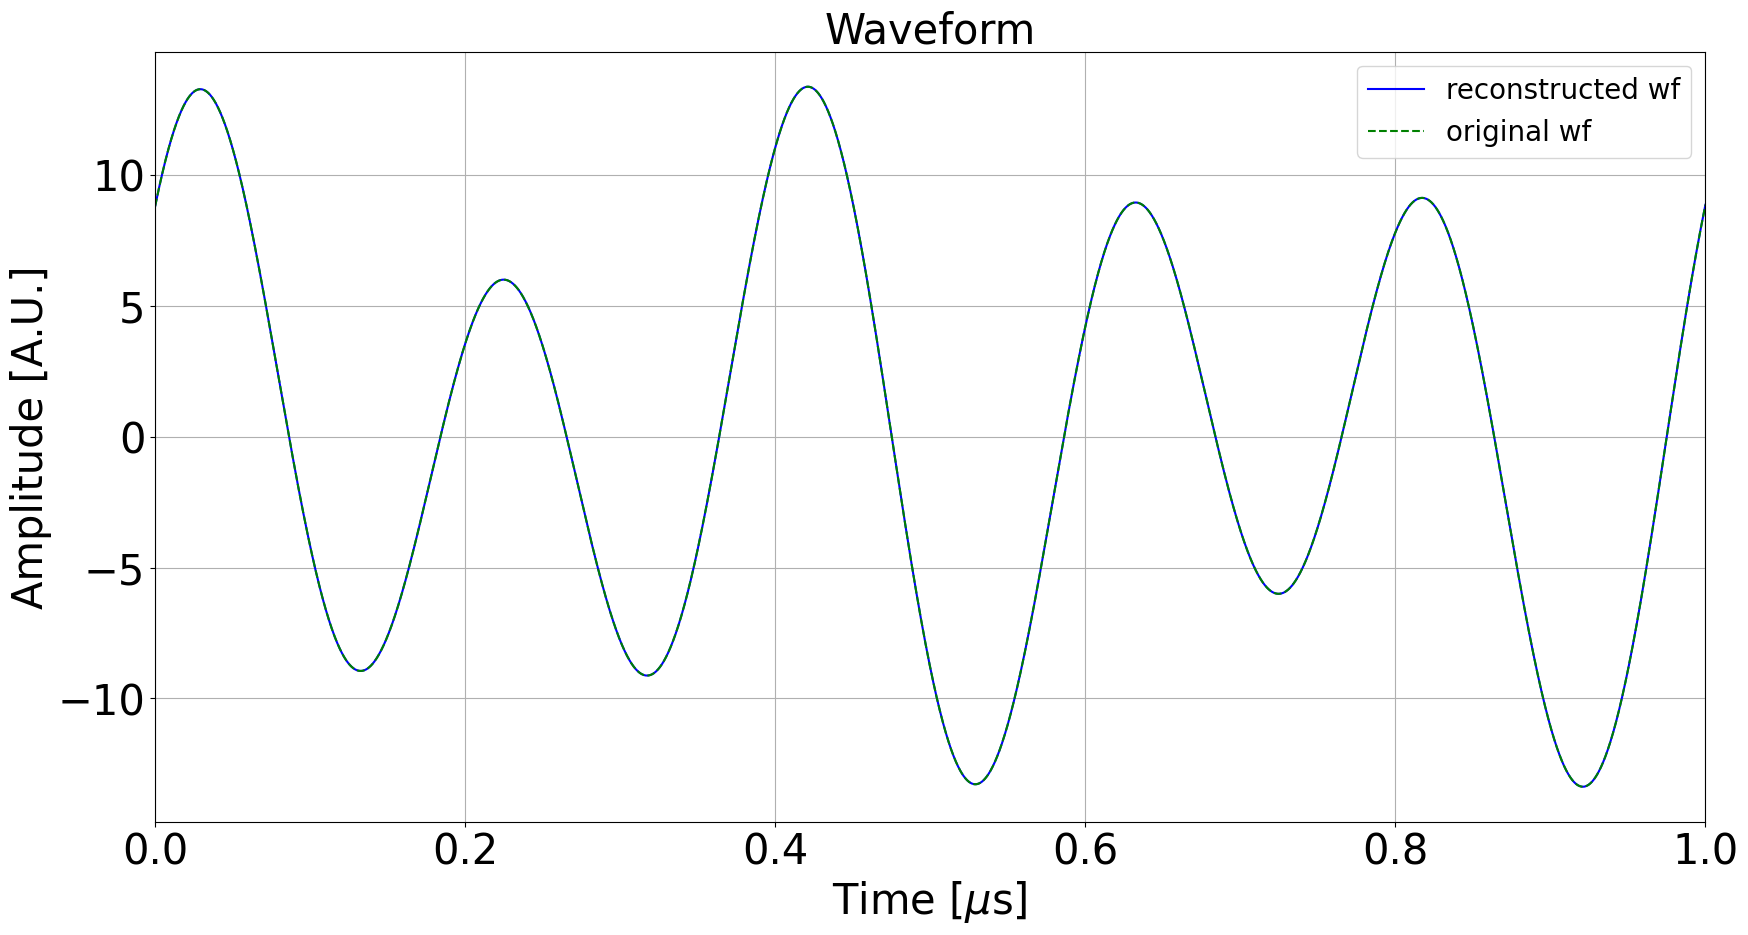

In [115]:
plt.figure(figsize = (20, 10))
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue') #why real?
plt.plot(times, amplitudes, label = 'original wf', color = 'green', linestyle = '--')

plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [116]:
reconstructed_filtered_wf = reconstructed_wf -noise_wf
reconstructed_filtered_fft = fft.fft(reconstructed_filtered_wf)

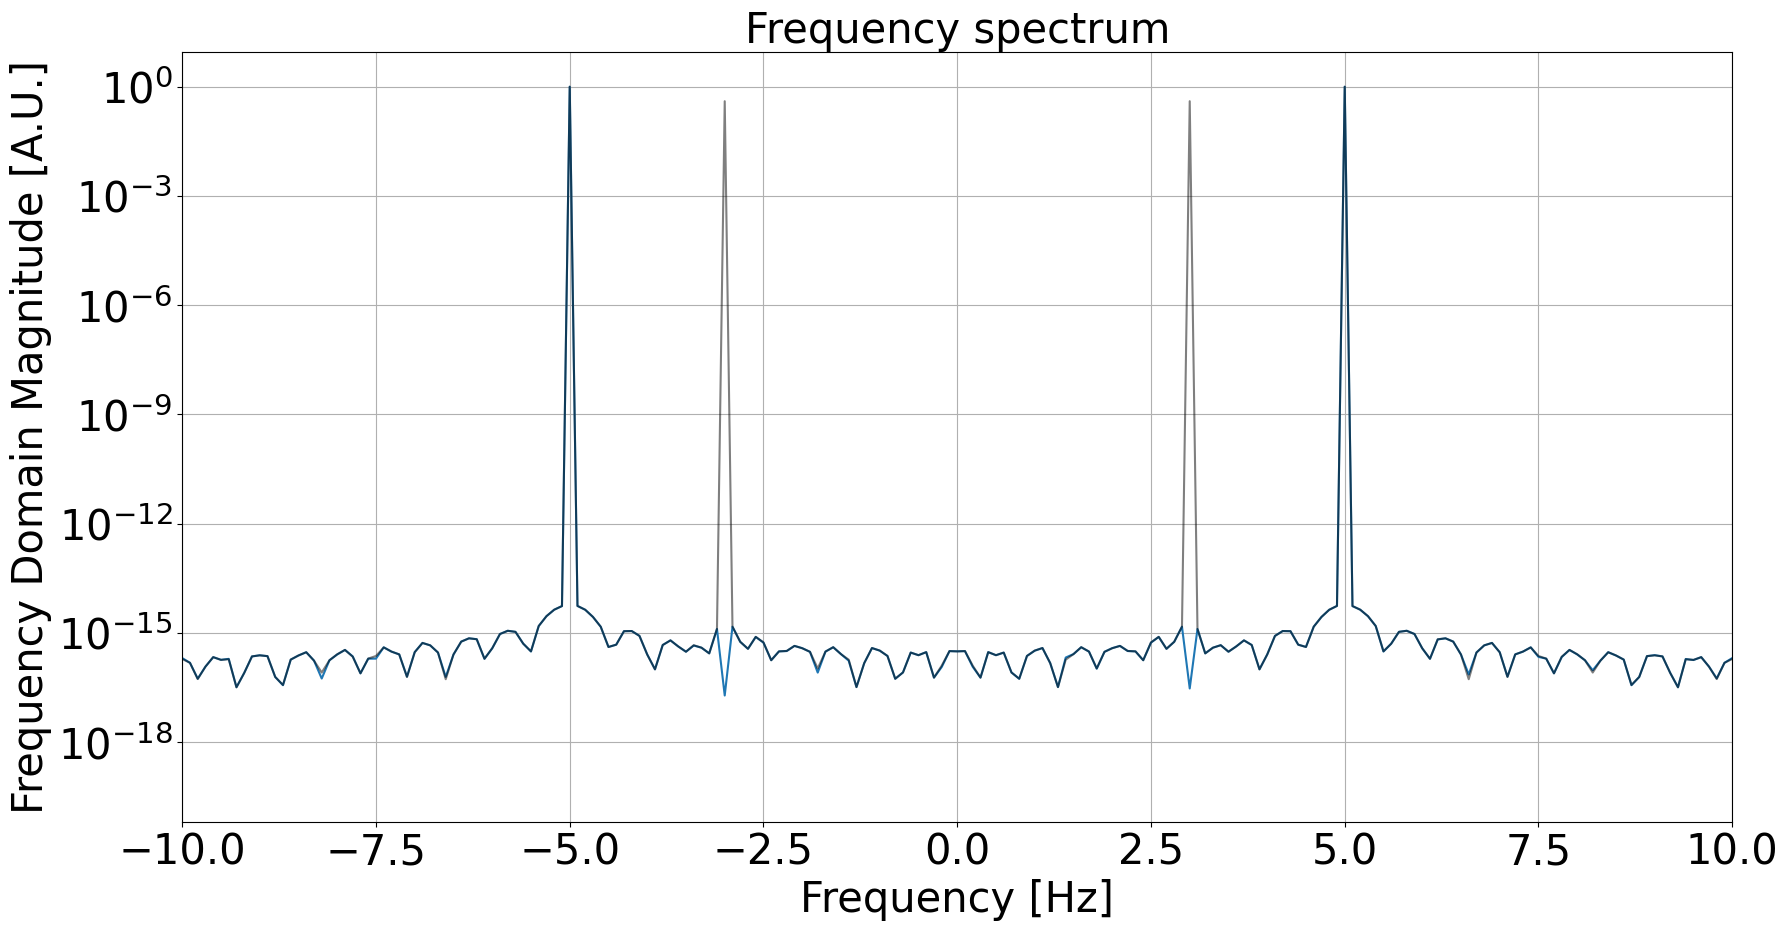

In [134]:
reconstructed_filtered_fft_shifted = fft.fftshift(reconstructed_filtered_fft)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(reconstructed_filtered_fft_shifted)/n)
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, color = 'k', alpha = 0.5)

plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(- f_s / 2, f_s / 2) #freq of time sampling
plt.xlim(-10, 10)
plt.semilogy()
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()
